## Captura do video

In [ ]:
# import sys
# import signal
# import cv2

# end = False

# # --------------------------------------
# def signal_handler(signal, frame):
#     global end
#     end = True

# # --------------------------------------
# cap = cv2.VideoCapture(0)

# # Tenta abrir a webcam, e já falha se não conseguir
# if not cap.isOpened():
#     print('Não foi possível abrir a web cam.')
#     sys.exit(-1)

# # Cria o arquivo de video de saída
# fourcc = cv2.VideoWriter_fourcc(*'MP4V')
# out = cv2.VideoWriter('./video/teste.mp4',fourcc, 20.0, (640,480))

# # Captura o sinal de CTRL+C no terminal
# signal.signal(signal.SIGINT, signal_handler)
# print('Capturando o vídeo da webcam -- pressione Ctrl+C para encerrar...')

# # Processa enquanto o usuário não encerrar (com CTRL+C)
# while(not end):
#     ret, frame = cap.read()
#     if ret:
#         out.write(frame)
#     else:
#         print('Oops! A captura falhou.')
#         break

# print('Captura encerrada.')

# # Encerra tudo
# cap.release()
# out.release()

### Convertendo o video em escala de cinza

In [ ]:
# # importing the module 
# import cv2 
# import numpy as np
  
# # reading the vedio 
# source = cv2.VideoCapture('./video/output.mp4') 

# # We need to set resolutions. 
# # so, convert them from float to integer. 
# frame_width = int(source.get(3)) 
# frame_height = int(source.get(4)) 
   
# size = (frame_width, frame_height) 

# result = cv2.VideoWriter('./video/gray.avi',  
#             cv2.VideoWriter_fourcc(*'MJPG'), 
#             10, size, 0) 
  
# # running the loop 
# while True: 
  
#     # extracting the frames 
#     ret, img = source.read() 
      
#     # converting to gray-scale 
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

#     # write to gray-scale 
#     result.write(gray)

#     # displaying the video 
#     cv2.imshow("Live", gray) 
  
#     # exiting the loop 
#     key = cv2.waitKey(1) 
#     if key == ord("q"): 
#         break
      
# # closing the window 
# cv2.destroyAllWindows() 
# source.release()


### Convertendo o video em escala de cinza em imagens

In [ ]:
# import cv2
# import sys

# vidcap = cv2.VideoCapture("./video/gray.avi")
# success,image = vidcap.read()
# count = 0
# while success:
#   cv2.imwrite("./images/frame%d.jpg" % count, image)     # save frame as JPEG file      
#   success,image = vidcap.read()
#   print('Read a new frame: ', success)
#   count += 1


#### Lista de imagens para a suavização gaussiana

In [17]:
from PIL import Image
import glob

image_list_gau = []
for filename in glob.glob('./images/*.jpg'):
    im=filename
    image_list_gau.append(im)

### Lista de imagens para a limiarização

In [19]:
from PIL import Image
import glob

image_list_limi = []
for filename in glob.glob('./suavizacao/*.png'):
    im=filename
    image_list_limi.append(im)

### Lista de imagens para a dilatação

In [2]:
from PIL import Image
import glob

image_list_dila = []
for filename in glob.glob('./limiarizacao/original_frame*.png'):
    im=filename
    image_list_dila.append(im)


### Lista de imagens para a região de contornos

In [2]:
from PIL import Image
import glob

image_list_con = []
for filename in glob.glob('./dilatacao/*.png'):
    im=filename
    image_list_con.append(im)

### Suavização Gaussiana
##### Utilize a lista de imagens necessarias

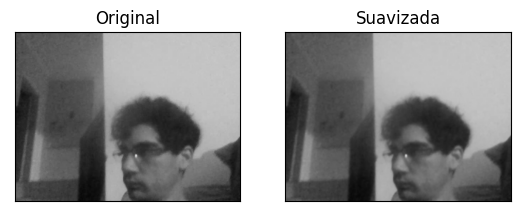

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


for image in image_list_gau:
    count = (image.split('frame')[1]).split('.')[0]
    
    img = cv2.imread(image)

    blur = cv2.GaussianBlur(img,(5,5),0)
    
    cv2.imwrite(f'./suavizacao/frame_blur{count}.png', blur)

    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(blur),plt.title('Suavizada')
    plt.xticks([]), plt.yticks([])

plt.show()
    
    

### Limiarização
##### Utilize a lista de imagens necessarias

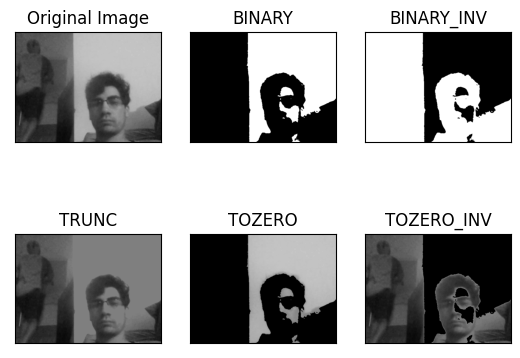

In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

for image in image_list_limi:
    count = (image.split('frame')[1]).split('.')[0]
    
    img = cv.imread(image, 0)
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
    ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
    ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
    ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
        plt.savefig(f'./limiarizacao/frame_bin{count}.png')

### Salvando apenas a limiarização binaria

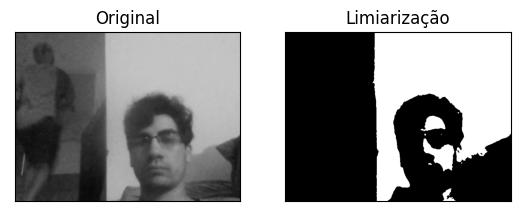

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

for image in image_list_limi:
    count = (image.split('frame')[1]).split('.')[0]
    
    img = cv.imread(image, 0)
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    limi = thresh1
    cv2.imwrite(f'./limiarizacao/original_frame{count}.png', limi)
    
    plt.subplot(121),plt.imshow(img,'gray',vmin=0,vmax=255),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(limi,'gray',vmin=0,vmax=255),plt.title('Limiarização')
    plt.xticks([]), plt.yticks([])
    
plt.show()
    

#### Dilatação
##### Utilize a lista de imagens necessarias

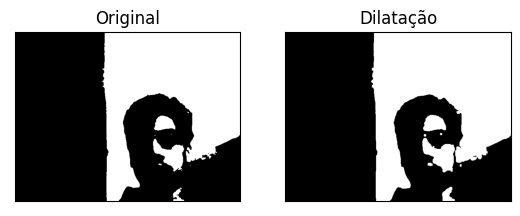

In [4]:

import cv2 as cv, cv2
import numpy as np
from matplotlib import pyplot as plt

for image in image_list_dila:
    count = (image.split('frame')[1]).split('.')[0]
    
    img = cv.imread(image, 0)
    kernel = np.ones((5, 5), 'uint8')
    dila = cv2.dilate(img, kernel, iterations=1)
    cv2.imwrite(f'./dilatacao/frame{count}.png', dila)
    
    plt.subplot(121),plt.imshow(img,'gray',vmin=0,vmax=255),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dila,'gray',vmin=0,vmax=255),plt.title('Dilatação')
    plt.xticks([]), plt.yticks([])

### Regiões de contorno
##### Utilize a lista de imagens necessarias

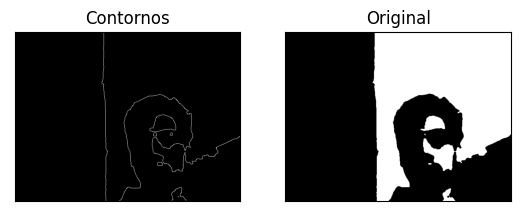

In [6]:
import cv2 as cv
import cv2
import numpy as np
from matplotlib import pyplot as plt

for image in image_list_con:
    count = (image.split('frame')[1]).split('.')[0]
    
    img = cv.imread(image, 0)
    
    edged = cv2.Canny(img, 30, 200)
    
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    cv2.imwrite(f'./contornos/frame{count}.png', edged)

    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
    #cv2.imshow('Conto', img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()        
    
    plt.subplot(121),plt.imshow(edged,'gray',vmin=0,vmax=255),plt.title('Contornos')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,'gray',vmin=0,vmax=255),plt.title('Original')
    plt.xticks([]), plt.yticks([])

### BOUNDING RECT

x1: 136 x2: 482 y1: 57 y2: 383


True

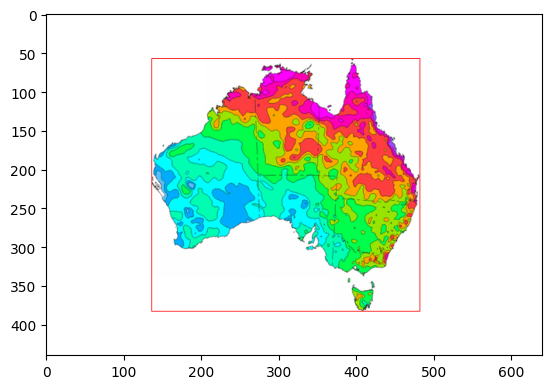

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filepath = "./retangulos/australia.png"
australia = cv2.imread(filepath)
australia_grey = cv2.cvtColor(australia, cv2.COLOR_BGR2GRAY)
australia_thresh = cv2.threshold(australia_grey,226,255,cv2.THRESH_BINARY)[1]
australia_binary = cv2.bitwise_not(australia_thresh)


x1,y1,w,h = cv2.boundingRect(australia_binary)
x2 = x1+w
y2 = y1+h


start = (x1, y1)
end = (x2, y2)
colour = (255, 0, 0)
thickness = 1
rectangle_img = cv2.rectangle(australia, start, end, colour, thickness)
print("x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
plt.imshow(rectangle_img, cmap="gray")
cv2.imwrite("./retangulos/retangulos.png", rectangle_img)

### Area de contorno

In [13]:
import cv2
import numpy as np

img1 = cv2.imread('./area_contorno/contornos.png')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,10,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of contours in image:",len(contours))

for i, cnt in enumerate(contours):
   M = cv2.moments(cnt)
   if M['m00'] != 0.0:
      x1 = int(M['m10']/M['m00'])
      y1 = int(M['m01']/M['m00'])
   area = cv2.contourArea(cnt)
   perimeter = cv2.arcLength(cnt, True)
   perimeter = round(perimeter, 4)
   print(f'Area of contour {i+1}:', area)
   print(f'Perimeter of contour {i+1}:', perimeter)
   img1 = cv2.drawContours(img1, [cnt], -1, (0,255,255), 3)
   cv2.putText(img1, f'Area :{area}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
   cv2.putText(img1, f'Perimeter :{perimeter}', (x1, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

cv2.imwrite("./area_contorno/Image.png", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours in image: 4
Area of contour 1: 29400.5
Perimeter of contour 1: 687.4142
Area of contour 2: 16206.5
Perimeter of contour 2: 608.6589
Area of contour 3: 25248.0
Perimeter of contour 3: 718.0
Area of contour 4: 19240.0
Perimeter of contour 4: 518.2153


### Captura de rosto

In [19]:
import cv2

def redim(img, largura): #função para redimensionar uma imagem
    alt = int(img.shape[0]/img.shape[1]*largura)
    img = cv2.resize(img, (largura, alt), interpolation =
    cv2.INTER_AREA)
    return img


#Cria o detector de faces baseado no XML
df = cv2.CascadeClassifier('./video/haarcascade_frontalface_default.xml')
#Abre um vídeo gravado em disco
camera = cv2.VideoCapture('./video/output.mp4')

while True:
    #read() retorna 1-Se houve sucesso e 2-O próprio frame
    (sucesso, frame) = camera.read()
    if not sucesso: #final do vídeo
        break
    #reduz tamanho do frame para acelerar processamento
    frame = redim(frame, 320)
    #converte para tons de cinza
    frame_pb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #detecta as faces no frame
    faces = df.detectMultiScale(frame_pb, scaleFactor = 1.1, minNeighbors=3, minSize=(20,20), flags=cv2.CASCADE_SCALE_IMAGE)
    frame_temp = frame.copy()
    for (x, y, lar, alt) in faces:
        cv2.rectangle(frame_temp, (x, y), (x + lar, y + alt), (0, 255, 255), 2)
    #Exibe um frame redimensionado (com perca de qualidade)
    cv2.imshow("Encontrando faces...", redim(frame_temp, 640))
    #Espera que a tecla 's' seja pressionada para sair
    if cv2.waitKey(1) & 0xFF == ord("s"):
        break
#fecha streaming
camera.release()
cv2.destroyAllWindows()